## Семинар 11. Jupyter Notebook и несколько слов об аналитике

### Даны две функции:

```f(x) = x^3 - 50x```

```g(x) = -x^4 + 88x^2 - 241```

In [189]:
from sympy import *
from sympy.abc import x
f = g = Function('f')

f = x ** 3 - 50 * x
g = -x ** 4 + 88 * x ** 2 - 241

1. Найти координаты точек пересечения

In [190]:
cross_points = [{'y': (f - g).subs(x, cross_x), 'x': cross_x} for cross_x in solve(f - g, x)]
# for point in cross_points:
#     print(
#         f'x = {point["x"]}\n'
#         f'y = {point["y"]}\n\n'
#         )
print('Точек пересечения:', len(cross_points))

Точек пересечения: 4


In [191]:
cross_points[0]['x']

-1/4 - sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))/2 - sqrt(707/6 - 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3) - 47/(4*sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))) - 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)))/2

In [192]:
cross_points[0]['y']

507/2 + 25*sqrt(707/6 - 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3) - 47/(4*sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))) - 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3))) + (-1/4 - sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))/2 - sqrt(707/6 - 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3) - 47/(4*sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))) - 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)))/2)**4 + (-1/4 - sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))/2 - sqrt(707/6 - 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3) - 47/(4*sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))) - 5393/(9*(198439/432 + sqrt(61480244863)*I/

и так далее.

2. Построить графики функций в одной системе координат

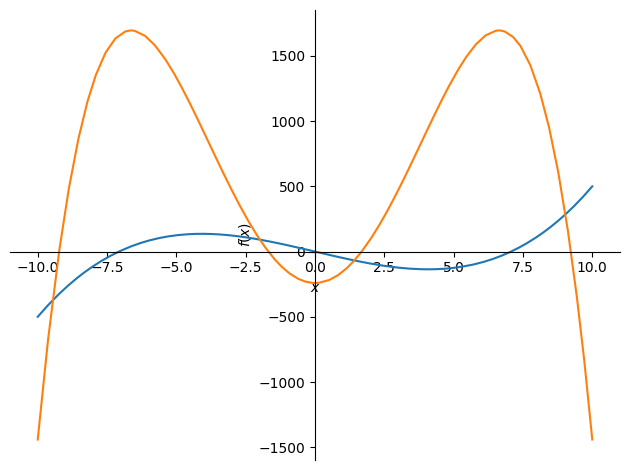

In [193]:
from sympy.plotting import plot
plot(f, g)


3. Построить график функции пересечения

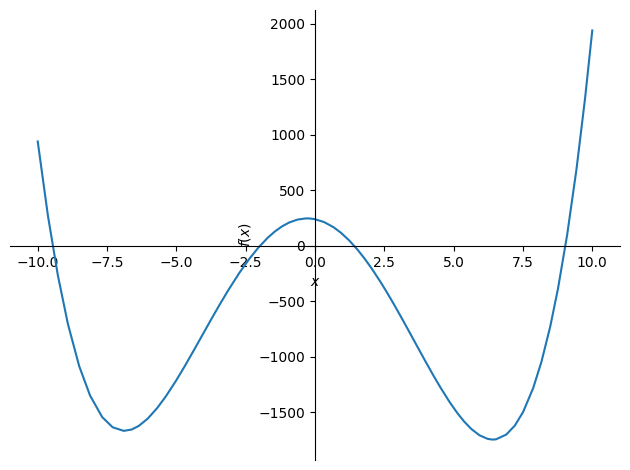

In [194]:
plot(f-g)

### Подобрать функцию пересеченя методом наименьших квадратов

In [195]:
simplify(f-g)

x**4 + x**3 - 88*x**2 - 50*x + 241

In [196]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

x = [complex(p['x']).real for p in cross_points]
y = [complex(p['y']).real * 10**133 for p in cross_points]
x, y

([-9.459404306671818,
  1.4181790066991111,
  -1.989333429849125,
  9.030558729821832],
 [-7386382.894228589,
  1803.3161362862766,
  1.761050914342067,
  -59091063.15382871])


Полином 3-й степени:
            3             2
-3.319e+04 x - 4.237e+05 x - 1.37e+05 x + 1.143e+06 

- Y распополамится через -2.7 дней
- Через 1 секунду у нас будет -59091247.29108091 по оси Y

Полином 4-й степени:
       4             3             2
-2268 x - 3.545e+04 x - 2.242e+05 x - 2.365e+04 x + 5.965e+05 

- Y распополамится через 7.5 дней
- Через 1 секунду у нас будет -59091288.00301727 по оси Y

Полином 5-й степени:
      5        4            3             2
-200 x - 2414 x - 1.78e+04 x - 2.189e+05 x - 7.452e+04 x + 6.094e+05 

- Y распополамится через -2.5 дней
- Через 1 секунду у нас будет -59091319.45874573 по оси Y


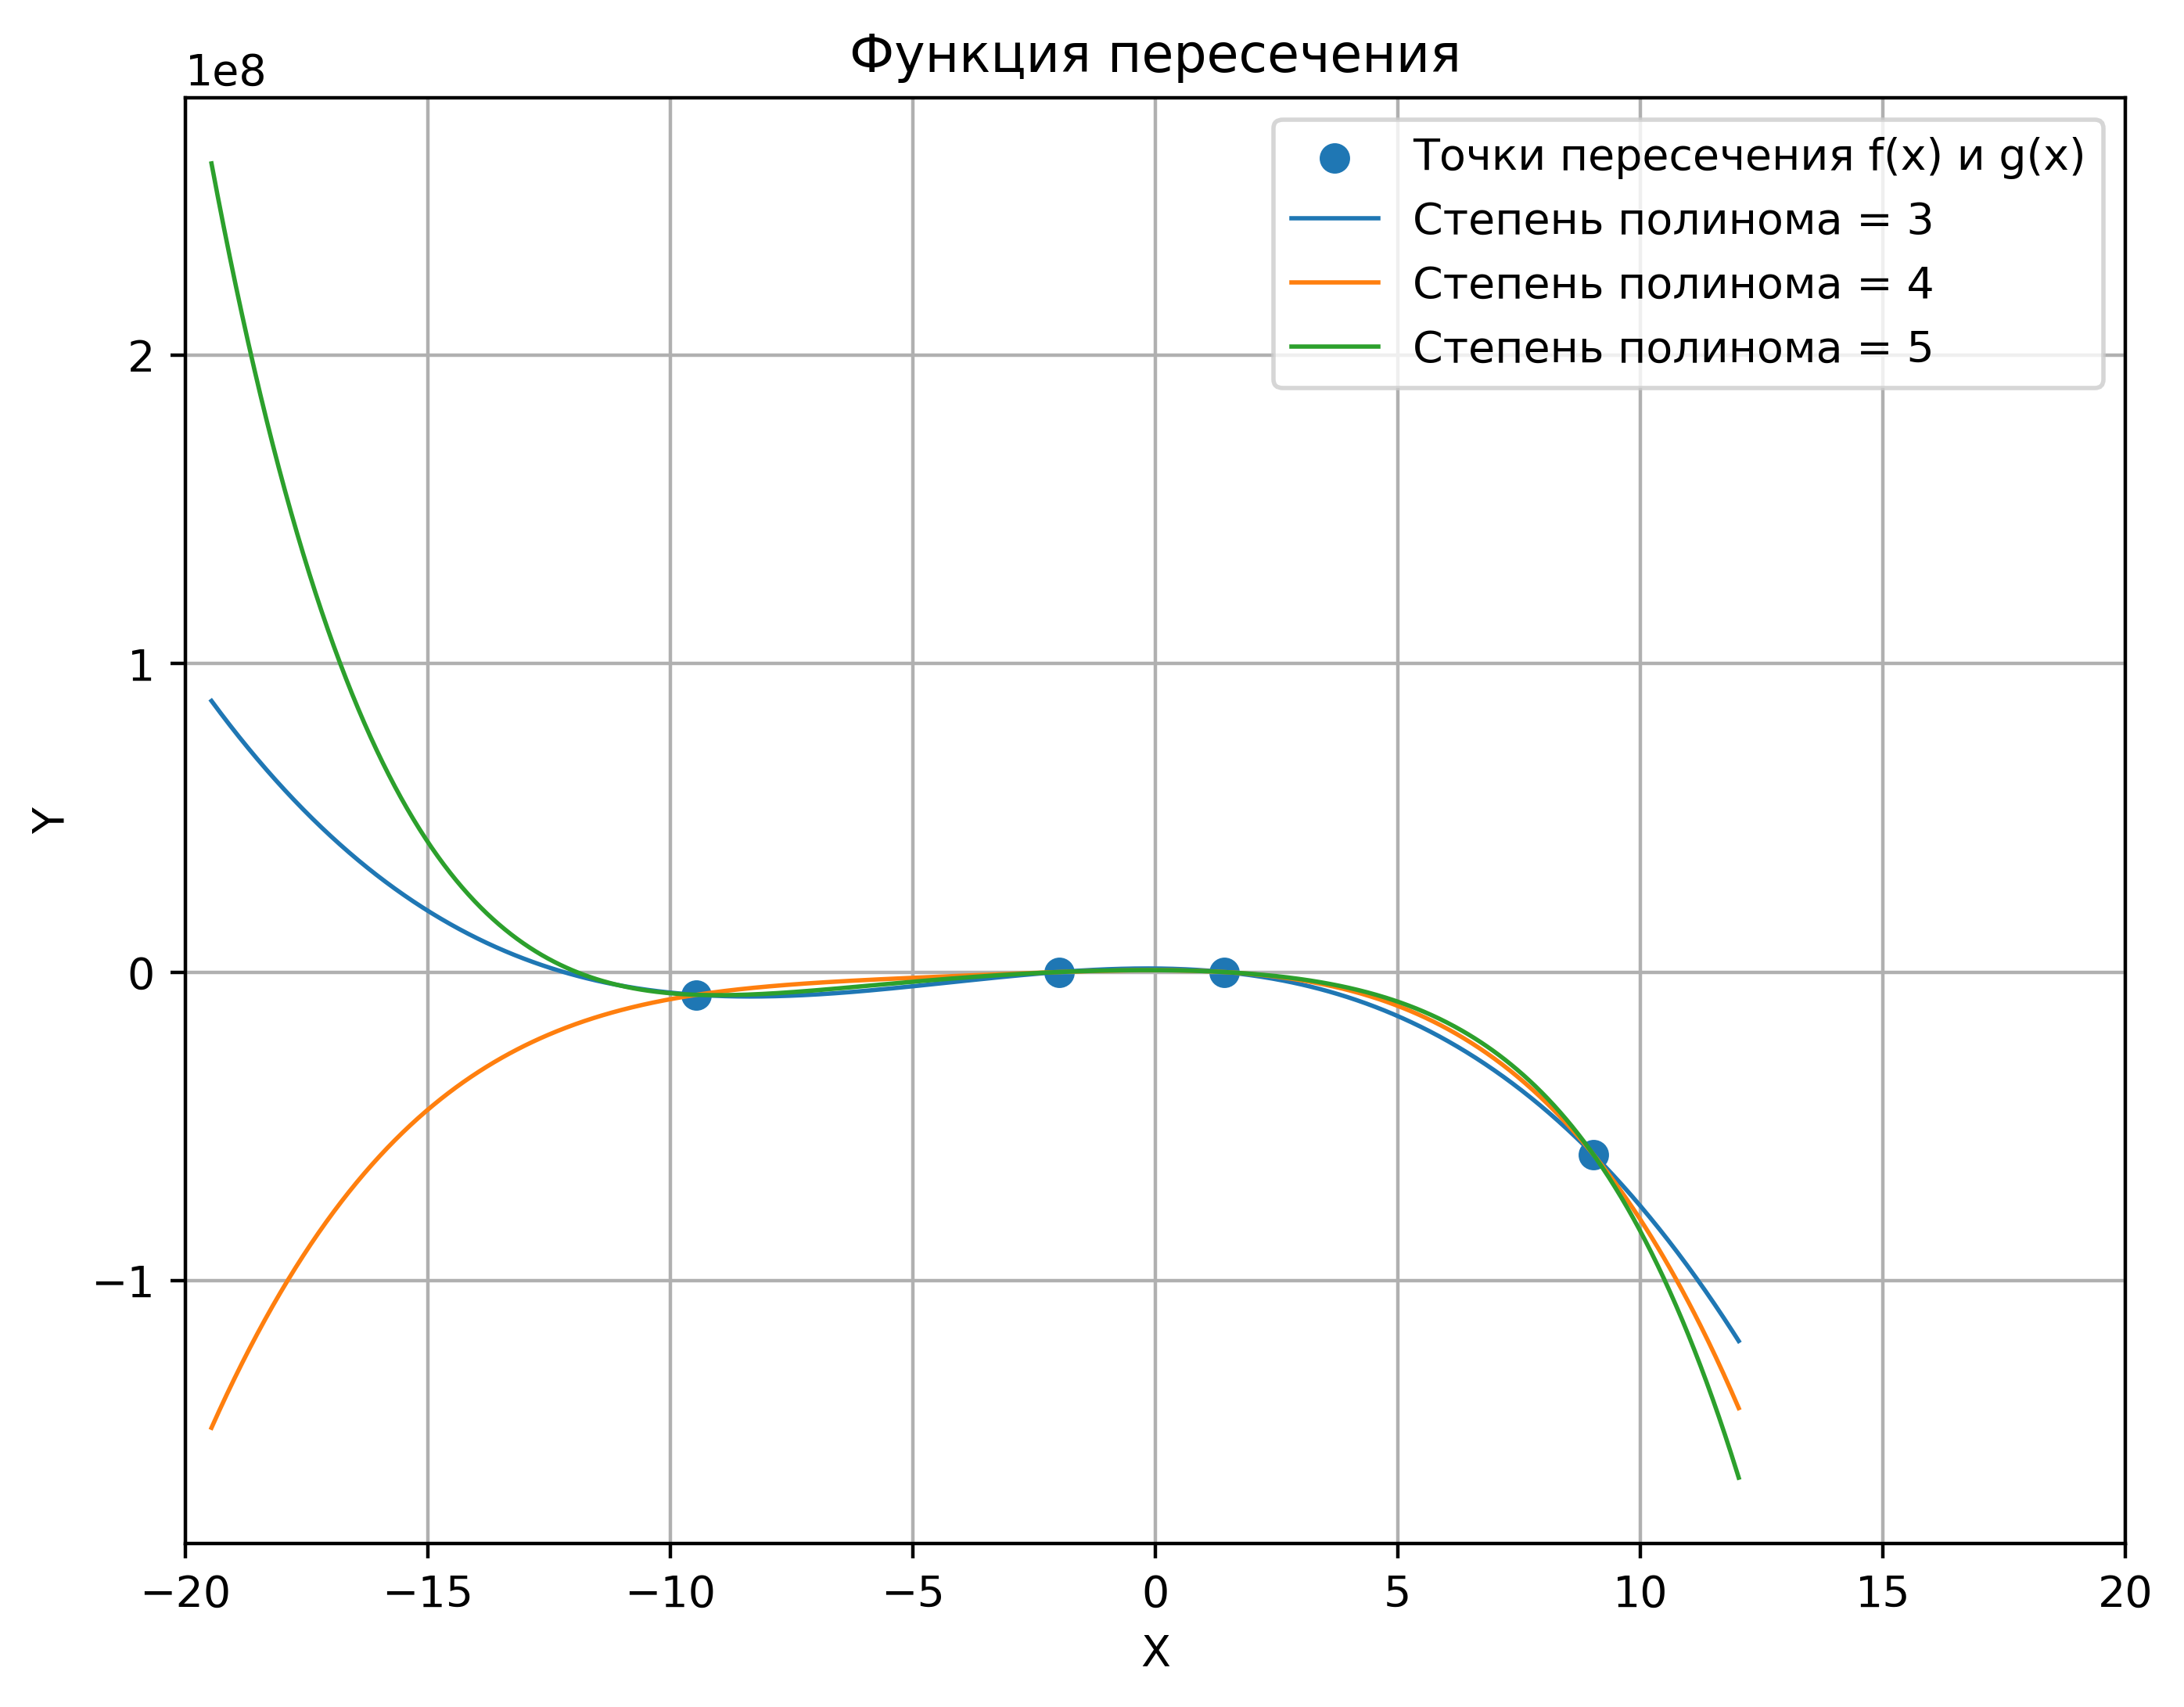

In [197]:
plt.figure(figsize=(8, 6), dpi=400)
plt.title("Функция пересечения")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-20, 20))
# рисуем исходные точки
plt.scatter(x, y)

legend = []
# аргументы для построения графиков моделей: исходный интервал + 60 дней
fx = np.linspace(min(x) - 10, max(x) + 3, 1000)
legend.append(f"Точки пересечения f(x) и g(x)")
for d in [3,4,5]:
    # получаем параметры модели для полинома степени d
    fp, residuals, rank, sv, rcond = np.polyfit(x, y, d, full=True)
    #print("Параметры модели: %s" % fp1)
    # функция-полином, если её напечатать, то увидите математическое выражение
    f = sp.poly1d(fp)
    # print(f)
    # рисуем график модельной функции
    plt.plot(fx, f(fx), linewidth=1)
    legend.append(f"Степень полинома = {f.order}")
    f2 = f / 2  # из полинома можно вычитать
    # ищем решение уравнения f2(x)=0, отплясывая от точки x[-1]
    t = fsolve(f2, min(x))
    print("\nПолином %d-й степени:" % f.order)
    print(f, '\n')
    print(f"- Y распополамится через {round(t[0] - min(x),1)} дней")
    print(f"- Через 1 секунду у нас будет {f(max(x) + 1/24/60/60)} по оси Y")
plt.legend(legend, loc="upper right")
plt.grid()
plt.show()